In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
class DataLoader:
    """Base class for loading and cleaning data"""
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """Load CSV file into a pandas DataFrame"""
        try:
            self.data = pd.read_csv(self.file_path, encoding='cp1252')
            print(f"Successfully loaded {self.file_path}")
        except FileNotFoundError:
            print(f"Error: File '{self.file_path}' not found.")
            self.data = None
        except Exception as e:
            print(f"Error loading file: {e}")
            self.data = None
        return self.data

    def clean_data(self):
        """Clean and preprocess the data"""
        if self.data is None:
            print("No data to clean")
            return None
        try:
            self.data['ORDERDATE'] = pd.to_datetime(self.data['ORDERDATE'])
            self.data['TOTAL_SALES'] = self.data['QUANTITYORDERED'] * self.data['PRICEEACH']
            self.data['YEAR'] = self.data['ORDERDATE'].dt.year
            self.data['MONTH'] = self.data['ORDERDATE'].dt.month
            self.data = self.data.dropna(subset=['QUANTITYORDERED', 'PRICEEACH', 'ORDERDATE'])
            print("Data cleaned successfully")
        except Exception as e:
            print(f"Error cleaning data: {e}")
            self.data = None
        return self.data

In [3]:
class DataAnalyzer(DataLoader):
    """Class for analyzing sales data, inherits from DataLoader"""
    def __init__(self, file_path):
        super().__init__(file_path)

    def analyze_yearly_sales(self):
        """Group data by year and sum total sales"""
        if self.data is None:
            print("No data to analyze")
            return None
        try:
            yearly_sales = self.data.groupby('YEAR')['TOTAL_SALES'].sum().reset_index()
            print("\nYearly Sales Summary:")
            print(yearly_sales)
            return yearly_sales
        except Exception as e:
            print(f"Error analyzing yearly sales: {e}")
            return None

    def analyze_product_sales(self):
        """Group data by product line and sum total sales"""
        if self.data is None:
            print("No data to analyze")
            return None
        try:
            product_sales = self.data.groupby('PRODUCTLINE')['TOTAL_SALES'].sum().reset_index()
            print("\nProduct Line Sales:")
            print(product_sales)
            return product_sales
        except Exception as e:
            print(f"Error analyzing product sales: {e}")
            return None

    def analyze_top_customers(self):
        """Group data by customer and get top 5 by total sales"""
        if self.data is None:
            print("No data to analyze")
            return None
        try:
            customer_sales = self.data.groupby('CUSTOMERNAME')['TOTAL_SALES'].sum().nlargest(5).reset_index()
            print("\nTop 5 Customers by Sales:")
            print(customer_sales)
            return customer_sales
        except Exception as e:
            print(f"Error analyzing customer sales: {e}")
            return None

In [4]:
class StatisticsCalculator:
    """Class for calculating statistics using NumPy"""
    def __init__(self, data):
        self.data = data

    def calculate_statistics(self):
        """Calculate mean, median, and standard deviation"""
        if self.data is None or 'TOTAL_SALES' not in self.data.columns:
            print("No valid data for statistics")
            return None
        try:
            total_sales = self.data['TOTAL_SALES'].values
            mean_sales = np.mean(total_sales)
            median_sales = np.median(total_sales)
            std_sales = np.std(total_sales)

            print("\nSales Statistics:")
            print(f"Mean Sales: ${mean_sales:.2f}")
            print(f"Median Sales: ${median_sales:.2f}")
            print(f"Standard Deviation: ${std_sales:.2f}")
            return mean_sales, median_sales, std_sales
        except Exception as e:
            print(f"Error calculating statistics: {e}")
            return None

In [5]:
class WordCounter:
    """Class for counting word frequencies in a text field"""
    def __init__(self, data):
        self.data = data

    def count_words(self, field):
        """Count word frequencies in the specified field (reused from prior program)"""
        if self.data is None or field not in self.data.columns:
            print(f"No valid data or field '{field}' not found")
            return None
        try:
            text = ' '.join(self.data[field].astype(str).str.lower())
            words = re.findall(r'\b\w+\b', text)
            word_counts = Counter(words)
            sorted_counts = sorted(word_counts.items(), key=lambda x: (-x[1], x[0]))

            print(f"\nTop 5 Words in {field}:")
            for word, count in sorted_counts[:5]:
                print(f"{word}: {count}")
            return word_counts
        except Exception as e:
            print(f"Error counting words: {e}")
            return None

In [6]:
class Plotter:
    """Class for plotting data"""
    def __init__(self, yearly_sales):
        self.yearly_sales = yearly_sales

    def plot_bar_chart(self):
        """Plot a bar chart of yearly sales"""
        if self.yearly_sales is None:
            print("No data to plot")
            return
        try:
            plt.figure(figsize=(10, 6))
            plt.bar(self.yearly_sales['YEAR'].astype(str), self.yearly_sales['TOTAL_SALES'], color='skyblue')
            plt.title('Annual Sales Revenue', fontsize=16)
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Total Sales ($)', fontsize=12)
            plt.grid(True, axis='y', linestyle='--', alpha=0.7)
            plt.savefig('annual_sales.png')
            plt.show()
            print("\nBar chart saved as 'annual_sales.png'")
        except Exception as e:
            print(f"Error plotting chart: {e}")

In [7]:
class ResultSaver:
    """Class for saving analysis results"""
    def __init__(self, yearly_sales, product_sales, customer_sales):
        self.yearly_sales = yearly_sales
        self.product_sales = product_sales
        self.customer_sales = customer_sales

    def save_results(self, filename="analysis_results.txt"):
        """Save analysis results to a text file"""
        if any(x is None for x in [self.yearly_sales, self.product_sales, self.customer_sales]):
            print("Incomplete data for saving results")
            return
        try:
            with open(filename, 'w') as file:
                file.write("Sales Analysis Results\n\n")
                file.write("Yearly Sales Summary:\n")
                file.write(self.yearly_sales.to_string(index=False))
                file.write("\n\nProduct Line Sales:\n")
                file.write(self.product_sales.to_string(index=False))
                file.write("\n\nTop 5 Customers:\n")
                file.write(self.customer_sales.to_string(index=False))
            print(f"Analysis results saved to {filename}")
        except Exception as e:
            print(f"Error saving results: {e}")

Successfully loaded sales_data_sample.csv
Data cleaned successfully

Yearly Sales Summary:
   YEAR  TOTAL_SALES
0  2003   2898149.94
1  2004   3913700.87
2  2005   1479035.98

Product Line Sales:
        PRODUCTLINE  TOTAL_SALES
0      Classic Cars   2968546.40
1       Motorcycles    971086.29
2            Planes    877942.21
3             Ships    677940.40
4            Trains    203804.26
5  Trucks and Buses    947355.18
6      Vintage Cars   1644212.05

Top 5 Customers by Sales:
                   CUSTOMERNAME  TOTAL_SALES
0         Euro Shopping Channel    766195.05
1  Mini Gifts Distributors Ltd.    530587.19
2    Australian Collectors, Co.    164575.87
3             La Rochelle Gifts    153909.82
4            Muscle Machine Inc    151782.04

Sales Statistics:
Mean Sales: $2936.91
Median Sales: $2800.00
Standard Deviation: $1105.45

Top 5 Words in CUSTOMERNAME:
co: 691
ltd: 544
gifts: 410
mini: 393
inc: 388


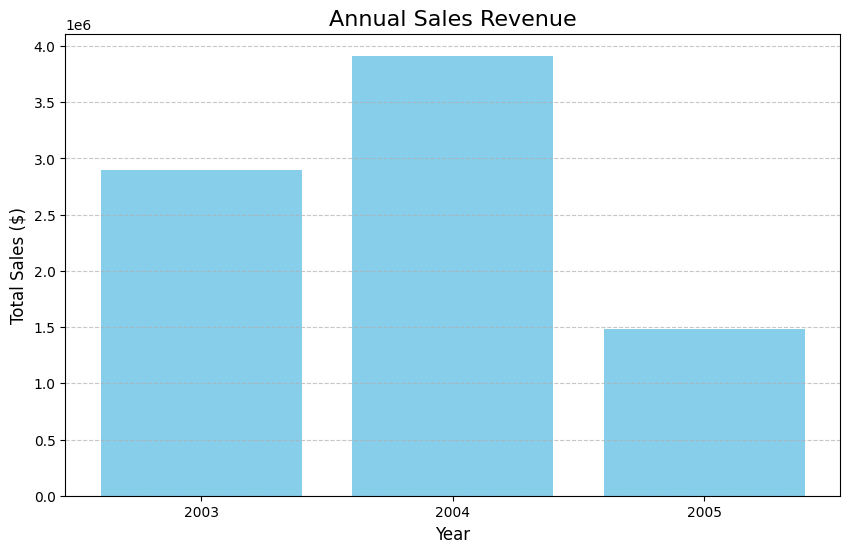


Bar chart saved as 'annual_sales.png'
Analysis results saved to analysis_results.txt


In [8]:
file_path = "sales_data_sample.csv"

# Load and clean data
analyzer = DataAnalyzer(file_path)
analyzer.load_data()
data = analyzer.clean_data()

if data is not None:
    # Analyze data
    yearly_sales = analyzer.analyze_yearly_sales()
    product_sales = analyzer.analyze_product_sales()
    customer_sales = analyzer.analyze_top_customers()

    # Calculate statistics
    stats_calc = StatisticsCalculator(data)
    stats_calc.calculate_statistics()

    # Count words
    word_counter = WordCounter(data)
    word_counter.count_words('CUSTOMERNAME')

    # Plot chart
    plotter = Plotter(yearly_sales)
    plotter.plot_bar_chart()

    # Save results
    saver = ResultSaver(yearly_sales, product_sales, customer_sales)
    saver.save_results()